In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv(r'C:\Users\Thota Divya\Desktop\INtellipaat---SQL\Python datasets\python Datasets\heart.csv')

In [20]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<h1 >Basic info about the given data set

In [22]:
data.shape

(303, 14)

<h1>DATA EXPLORATION

In [29]:
data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

C:\Users\Thota Divya\AppData\Local\Temp\ipykernel_67372\2224315094.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data,x = 'target',palette = 'coolwarm')


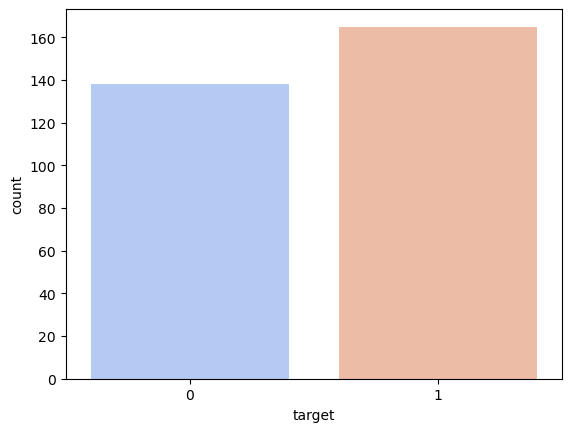

In [47]:
sns.countplot(data = data,x = 'target',palette = 'coolwarm')
plt.show()

<h1>Spliting the data into features(X) and target(y) label sets

In [52]:
x = pd.DataFrame(data.iloc[:,:-1])
y = pd.DataFrame(data.iloc[:,-1])

In [54]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [56]:
y.head()

,target
0,1
1,1
2,1
3,1
4,1


<h1>Splitting the data into training and test data

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 1)

<h1>Create and train the model

In [67]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

C:\Users\Thota Divya\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Thota Divya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

<h1> Predicting the test set results

In [72]:
y_pred = logmodel.predict(x_test)

In [74]:
print('Accuracy: %d',(logmodel.score(x_test,y_test)))

Accuracy: %d 0.7704918032786885


<h1>Evaluating model using confusion Matrix

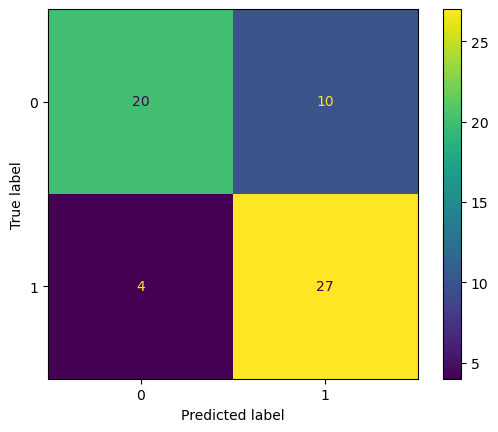

In [108]:
from sklearn.metrics import ConfusionMatrixDisplay
fig = ConfusionMatrixDisplay(confusion_matrix)
fig.plot()

In [79]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)


[[20 10]
 [ 4 27]]


In [110]:
# left diagnol gives the correct predictions:20,25 and right diagnol incorrect predictions:10,6
# calculating accuracy from the obtained confusion_matrix
accuracy = (20+27)/(20+25+10+6)
print(f'Accuracy of confusion_matrix: {accuracy}' )

Accuracy of confusion_matrix: 0.7704918032786885


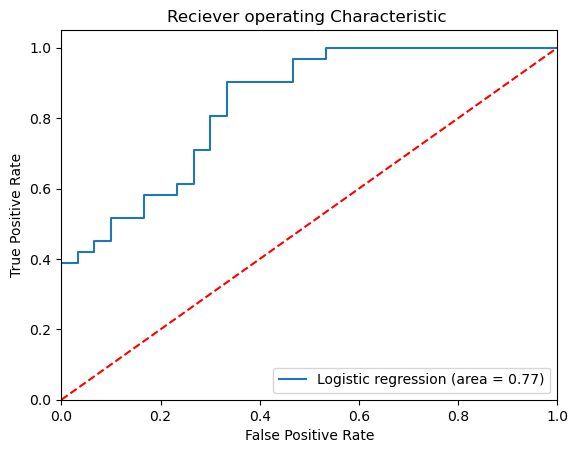

In [116]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test,y_pred)
fpr,tpr,thresholds = roc_curve(y_test,logmodel.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label = 'Logistic regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever operating Characteristic ')
plt.legend(loc = "lower right")
plt.savefig('Log_Roc')
plt.show()

In [ ]:
Insights: We can see that our plot is farther from the reference line so our model is performing better